In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load csv
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"


In [3]:
#Read teh city data file and store as a DataFrame
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read ride data
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [5]:
#Inspect City Data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get unique values of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get number of data points for urban
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
#Inspect Ride data, column and row
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#Columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [15]:
#Combine dataframes into single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [16]:
#Create the urban cities dataframe
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [17]:
#Get the number of rides for urban
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
#Average fare for urban cities
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
#Average drivers for urban
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12
Barajasview            26
Carriemouth            52
Christopherfurt        41
Deanville              49
                       ..
West Patrickchester    25
West Robert            39
West Samuelburgh       73
Williamsstad           59
Williamsview           46
Name: driver_count, Length: 66, dtype: int64

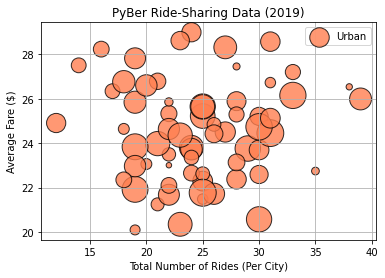

In [20]:
#Build scatter plot for urban
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black",
           linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a Legend
plt.legend()

In [21]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [22]:
#Create the suburban data frame
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,3/2/2019 17:06,13.92,7.388940e+12,12,Suburban
2246,Lake Robertside,4/3/2019 3:27,12.76,1.301760e+12,4,Suburban
2247,Colemanland,1/10/2019 6:49,27.70,8.704070e+12,23,Suburban
2248,East Marymouth,2/12/2019 23:18,47.41,7.409660e+12,5,Suburban


In [23]:
#Create suburban ride count
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [24]:
#Average suburban fare
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [25]:
#Average drivers for suburban
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11
Bethanyland           22
Brandonfort           10
Colemanland           23
Davidfurt             23
East Aaronbury         7
East Danielview       22
East Kentstad         20
East Marymouth         5
Grayville              2
Josephside            25
Lake Ann               3
Lake Omar             22
Lake Robertside        4
Lake Scott            23
Lewishaven            23
Lewisland              4
Mezachester           14
Myersshire            19
New Olivia            20
New Raymond           17
New Shannonberg       20
Nicolechester         19
North Jeffrey         11
North Richardhaven     1
North Timothy          7
Port Shane             7
Rodriguezview         20
Sotoville             10
South Brenda           1
South Teresa          21
Veronicaberg          20
Victoriaport          16
West Hannah           12
West Kimmouth          4
Williamsonville        2
Name: driver_count, dtype: int64

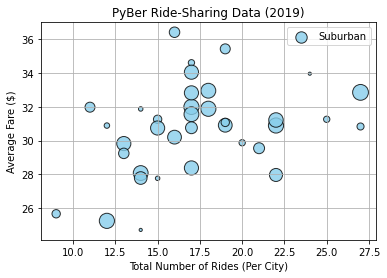

In [26]:
#Suburban Scatter plot
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a Legend
plt.legend()

In [27]:
#Get summary stats
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [28]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
#Create rural data fram
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [30]:
#Rural ride count
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [31]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [32]:
#Average rural fare
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [33]:
#Rural driver count
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

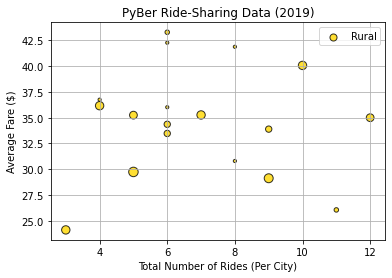

In [34]:
#Create Rural Plot
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a Legend
plt.legend()

In [35]:
#Get Summary Stats
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


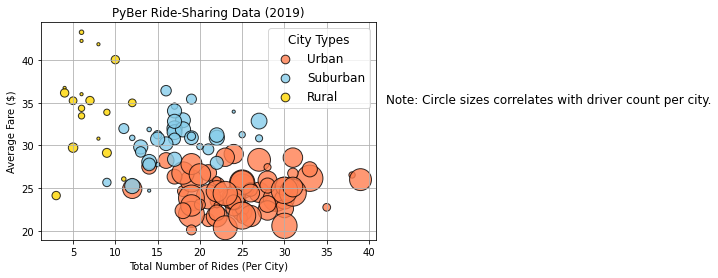

In [36]:
#Add and combine the scatter plots
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black",
           linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")

#Incorporate other grid properties
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add and create the legend
lgnd=plt.legend(fontsize="12", mode="Expanded",
               scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle sizes correlates with driver count per city.", fontsize="12")

#Save the figure
plt.savefig("Analysis/Fig1.png")

In [37]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
#Median for rides in urban cities
urban_ride_count.median()

24.0

In [39]:
#Calculate mode for urban
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [40]:
#mode suburban
suburban_ride_count.mode()

0    17
dtype: int64

In [41]:
#Import NumPy and SciPy
import numpy as np
import scipy.stats as sts

In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}." )

median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [43]:
#Suburban and rural mode
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")



The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [44]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}." )

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for for urban trips is {median_urban_fares:.2f}.")

mode_urban_fares=sts.mode(urban_fares)

print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for for urban trips is 24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
#Get fares for suburban
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [47]:
#Rural fares
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [48]:
#Mean for rural and suburban
mean_suburban_fares=np.mean(suburban_fares)
print(mean_suburban_fares)

mean_rural_fares=np.mean(rural_fares)
print(mean_rural_fares)

30.97012800000002
34.623440000000016


In [49]:
#Get driver count for urban
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [50]:
#Suburban driver count
suburban_drivers=suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [51]:
#rural driver count
rural_drivers=rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [52]:
#Mean
mean_urban_drivers=np.mean(urban_drivers)
print(mean_urban_drivers)

mean_suburban_drivers=np.mean(suburban_drivers)
print(mean_suburban_drivers)

mean_rural_drivers=np.mean(rural_drivers)
print(mean_rural_drivers)

36.67815384615385
13.712
4.296


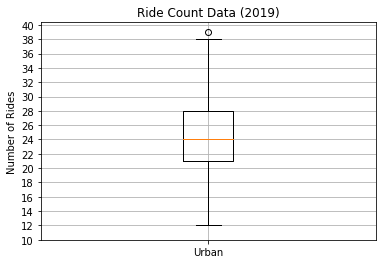

In [53]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add Title, y label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


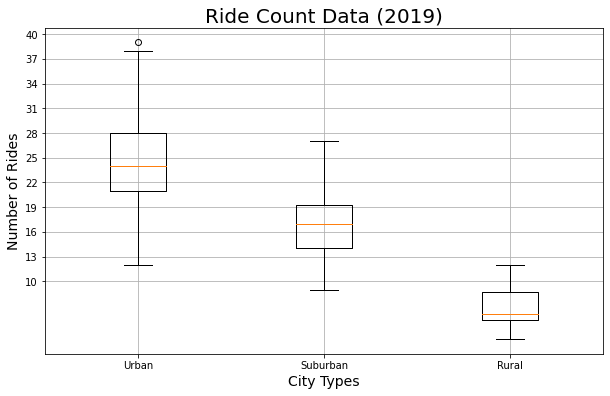

In [54]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(10, 41, step=3.0))
ax.grid()
plt.savefig("analysis/fig2.png")
plt.show()


In [55]:
#Get urban city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


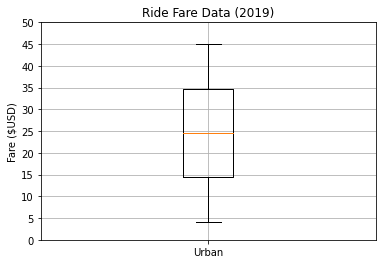

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [56]:
# Create a box-and-whisker plot for the urban fares.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#Add Title, y label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()



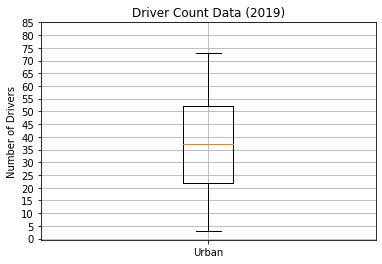

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [57]:
# Create a box-and-whisker plot for driver count data.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
#Add Title, y label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [58]:
#Get sum of the fares for each city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
#Sum of all fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [60]:
#Calculate percentage of fare for each city
type_percents=100*sum_fares_by_type/total_fares
type_percents

#Advanced all in one line
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
#type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

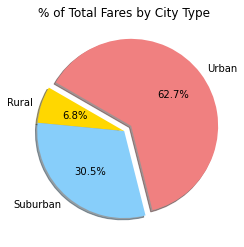

In [61]:
#Import mpl to change plot config
import matplotlib as mpl
#Create pie chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0,0,.1],
       autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#Change the default font size
mpl.rcParams['font.size']=14
#Save
plt.savefig("analysis/fig5.png")
plt.show

In [62]:
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [63]:
pyber_data_df["ride_id"].count()

2375

In [64]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

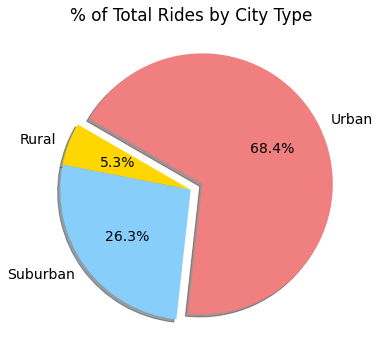

In [72]:
#Import mpl to change plot config
import matplotlib as mpl
#Create pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0,0,.1],
       autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#Change the default font size
mpl.rcParams['font.size']=14
#Save
plt.savefig("analysis/fig6.png")
plt.show

In [67]:
city_data_df.groupby(["type"]).sum()["driver_count"]

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [68]:
city_data_df["driver_count"].sum()

2973

In [69]:
driver_percents=100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

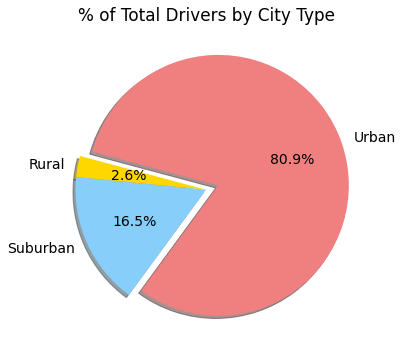

In [73]:
#Import mpl to change plot config
import matplotlib as mpl
#Create pie chart
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0,0,.1],
       autopct='%1.1f%%', shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
#Change the default font size
mpl.rcParams['font.size']=14
#Save
plt.savefig("analysis/fig7.png")
plt.show